**Section I: Import the Data**

Imports and Read in File

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

import seaborn as sns

In [4]:
seeds = pd.read_csv("/Users/generalassembly/Documents/repo-DC-DSI-3/DC-DSI-3/curriculum/07-week/7.02-intro-to-clustering-lab/assets/datasets/seeds.csv")

In [6]:
seeds.head()

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [9]:
X = seeds[['area','perimeter','compactness','length','width','asymmetry_coeff','groove_length']]

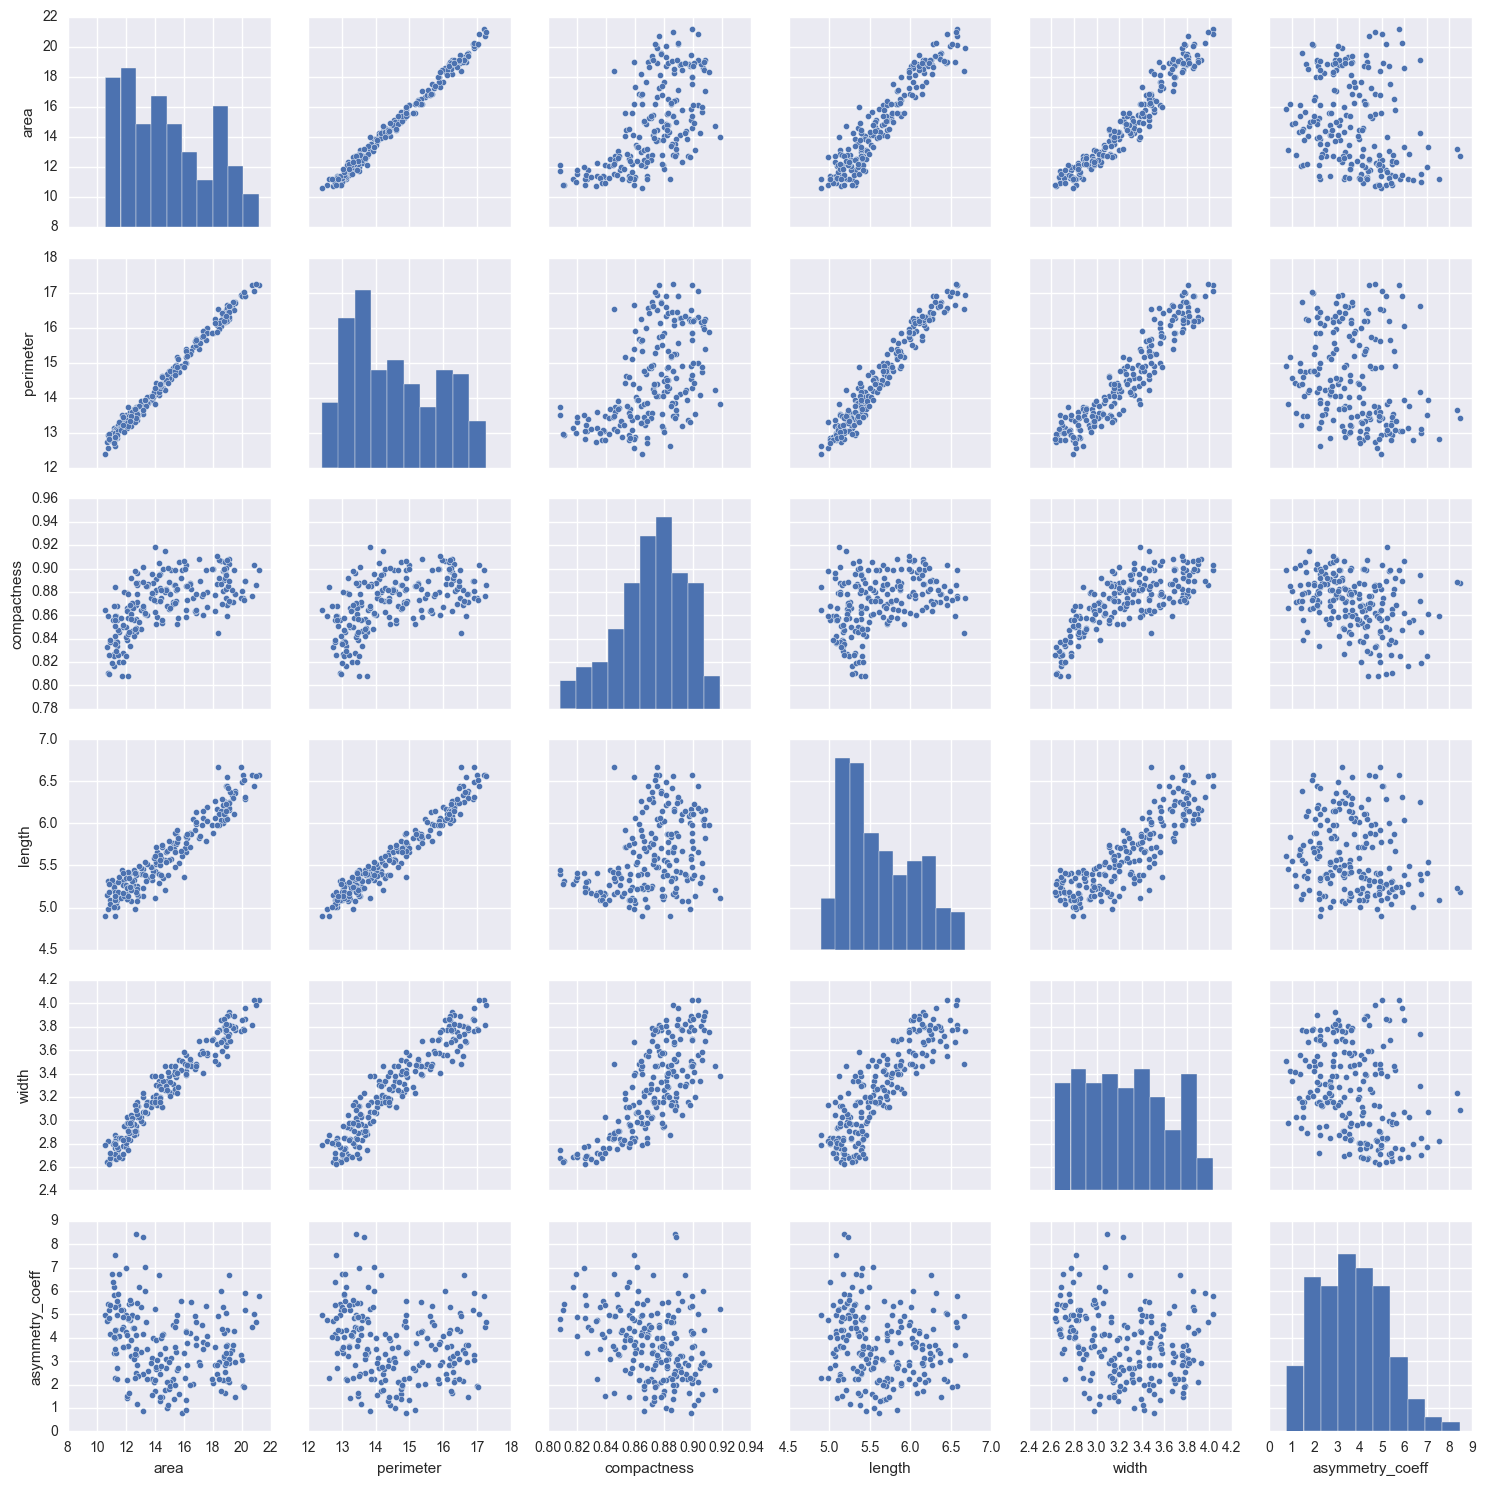

In [10]:
cols = X.columns[:-1]
sns.pairplot(X[cols])

In [12]:
from sklearn import cluster, datasets, preprocessing, metrics
X_scaled = preprocessing.StandardScaler().fit_transform(X)

In [13]:
pd.DataFrame(X_scaled, columns=X.columns).describe()

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,-5.392512e-17,9.146123e-17,1.406679e-15,-2.214631e-15,-3.172066e-16,-2.082990e-16,-9.992007e-17
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00
min,-1.466714e+00,-1.649686e+00,-2.668236e+00,-1.650501e+00,-1.668209e+00,-1.956769e+00,-1.813288e+00
25%,-8.879552e-01,-8.514330e-01,-5.980791e-01,-8.286816e-01,-8.349072e-01,-7.591477e-01,-7.404953e-01
50%,-1.696741e-01,-1.836639e-01,1.039927e-01,-2.376280e-01,-5.733534e-02,-6.746852e-02,-3.774588e-01
75%,8.465989e-01,8.870693e-01,7.116771e-01,7.945947e-01,8.044956e-01,7.123789e-01,9.563941e-01
max,2.181534e+00,2.065260e+00,2.006586e+00,2.367533e+00,2.055112e+00,3.170590e+00,2.328998e+00


In [14]:
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [15]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

print labels
print centroids
print inertia

[0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 0 2 0 0 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1]
[[-0.14111949 -0.17004259  0.4496064  -0.25781445  0.00164694 -0.66191867
  -0.58589311]
 [-1.03025257 -1.00664879 -0.9649051  -0.89768501 -1.08558344  0.69480448
  -0.62480856]
 [ 1.25668163  1.26196622  0.56046437  1.23788278  1.16485187 -0.04521936
   1.29230787]]
430.658973151


In [16]:
metrics.silhouette_score(X_scaled, labels, metric='euclidean')

0.40072705527512992

In [18]:
seeds['label'] = labels
X['label'] = labels
seeds

/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length,species,label
0,15.26,14.84,0.8710,5.763,3.312,2.2210,5.220,1,0
1,14.88,14.57,0.8811,5.554,3.333,1.0180,4.956,1,0
2,14.29,14.09,0.9050,5.291,3.337,2.6990,4.825,1,0
3,13.84,13.94,0.8955,5.324,3.379,2.2590,4.805,1,0
4,16.14,14.99,0.9034,5.658,3.562,1.3550,5.175,1,0
5,14.38,14.21,0.8951,5.386,3.312,2.4620,4.956,1,0
6,14.69,14.49,0.8799,5.563,3.259,3.5860,5.219,1,0
7,14.11,14.10,0.8911,5.420,3.302,2.7000,5.000,1,0
8,16.63,15.46,0.8747,6.053,3.465,2.0400,5.877,1,2
9,16.44,15.25,0.8880,5.884,3.505,1.9690,5.533,1,0


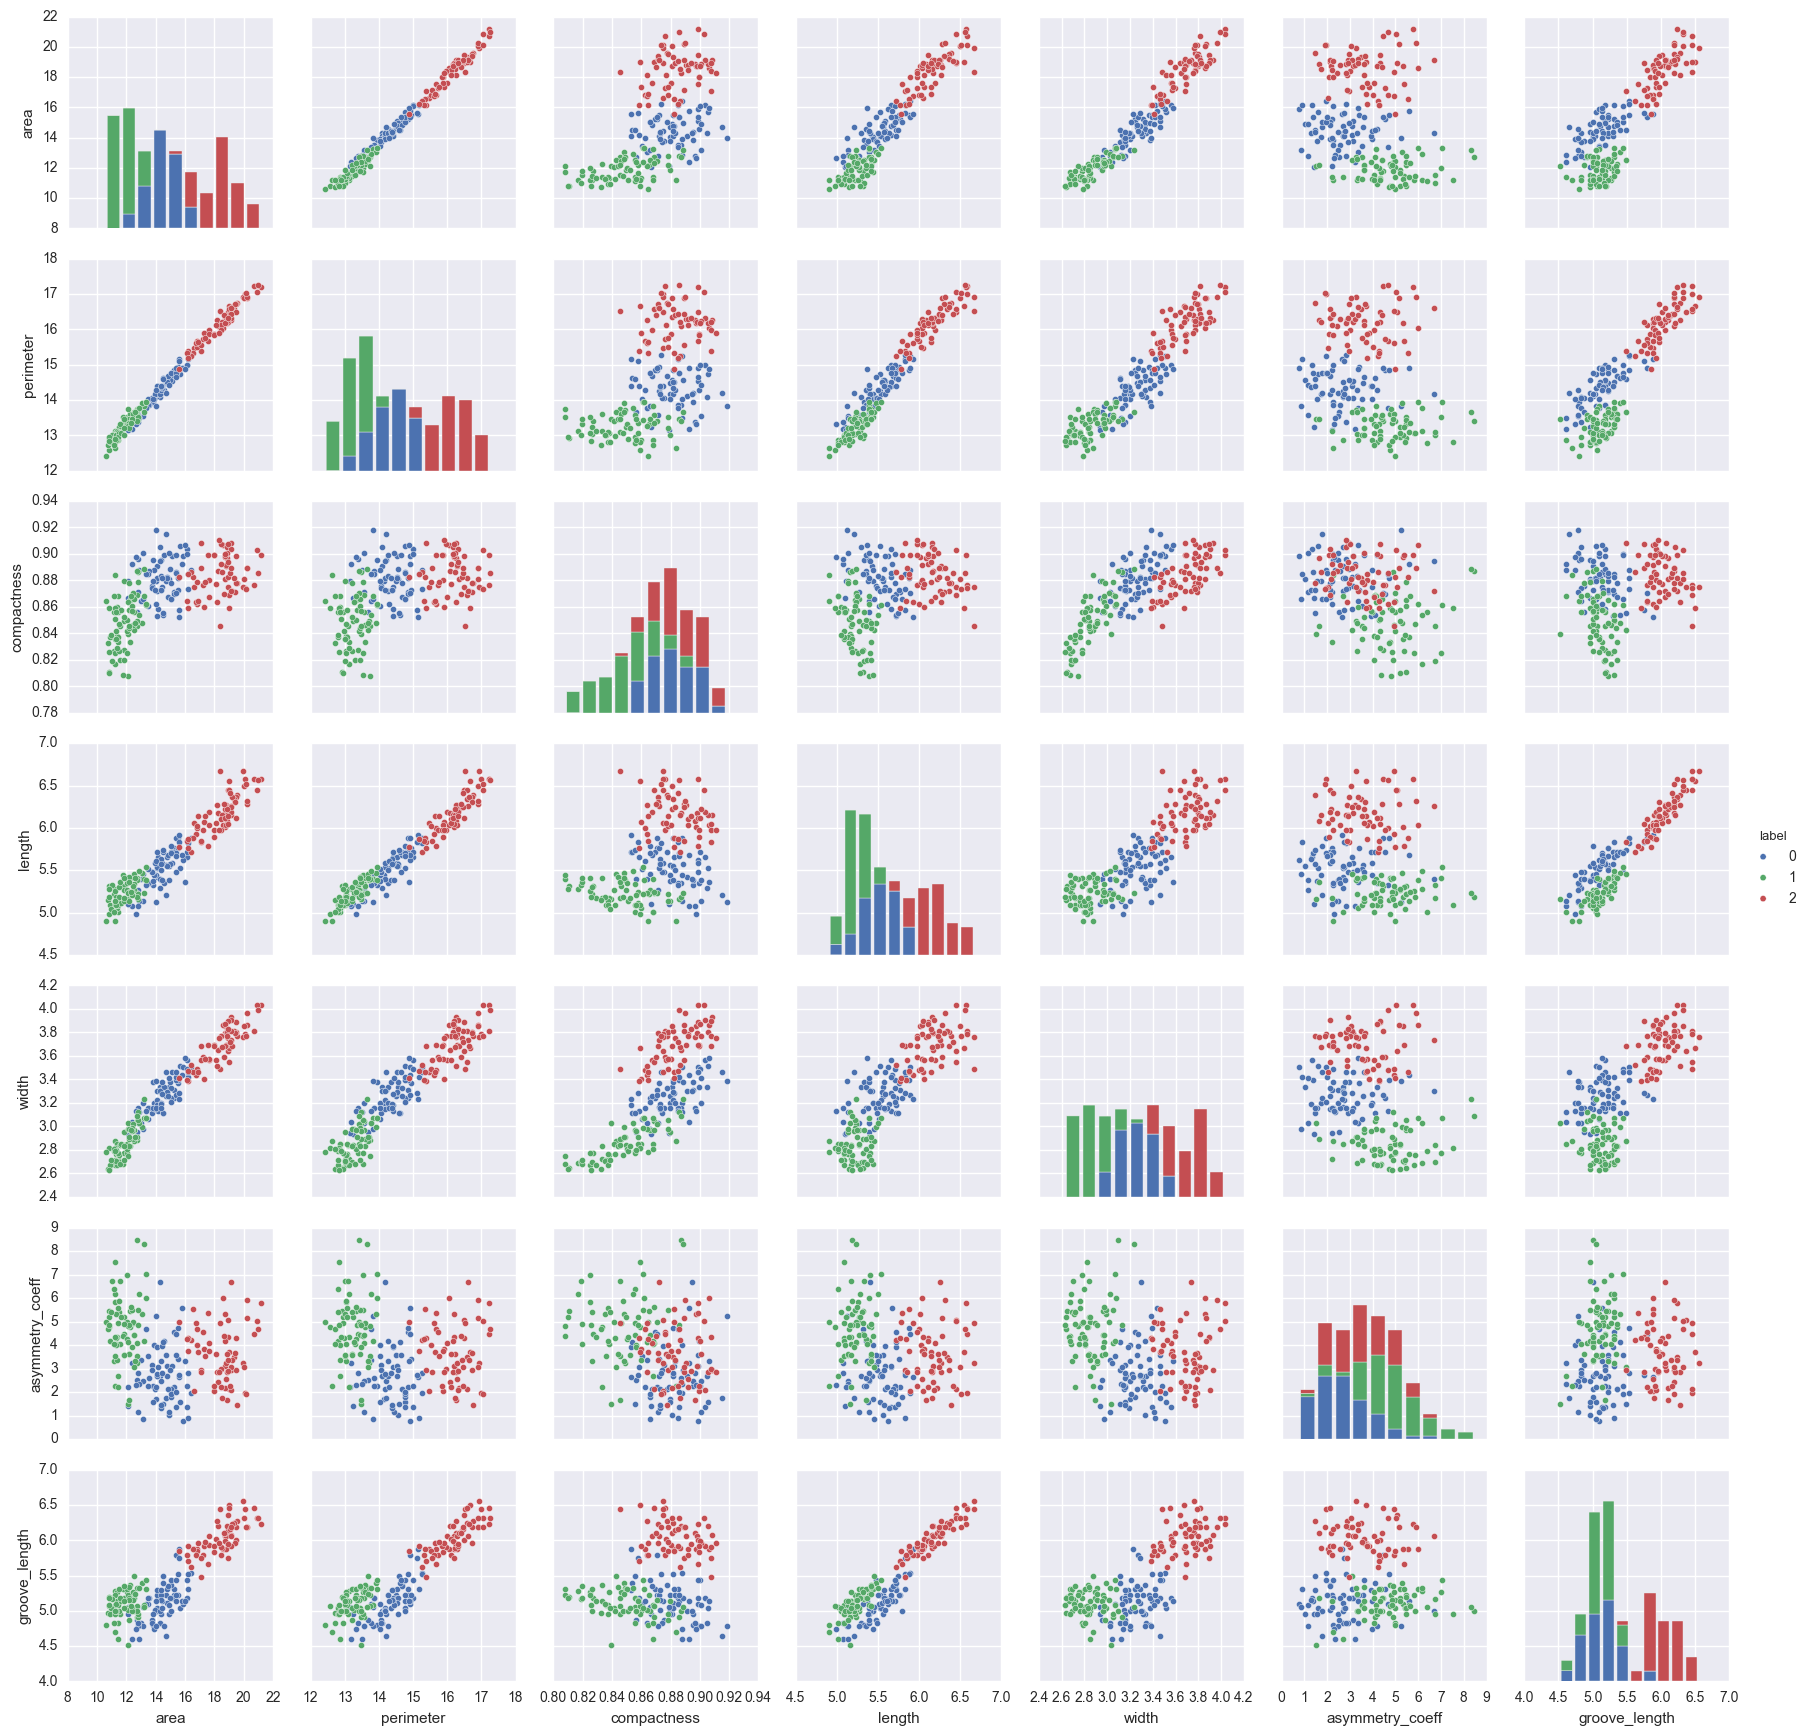

In [19]:
cols = X.columns[:-1]
sns.pairplot(X, x_vars=cols, y_vars= cols, hue='label')

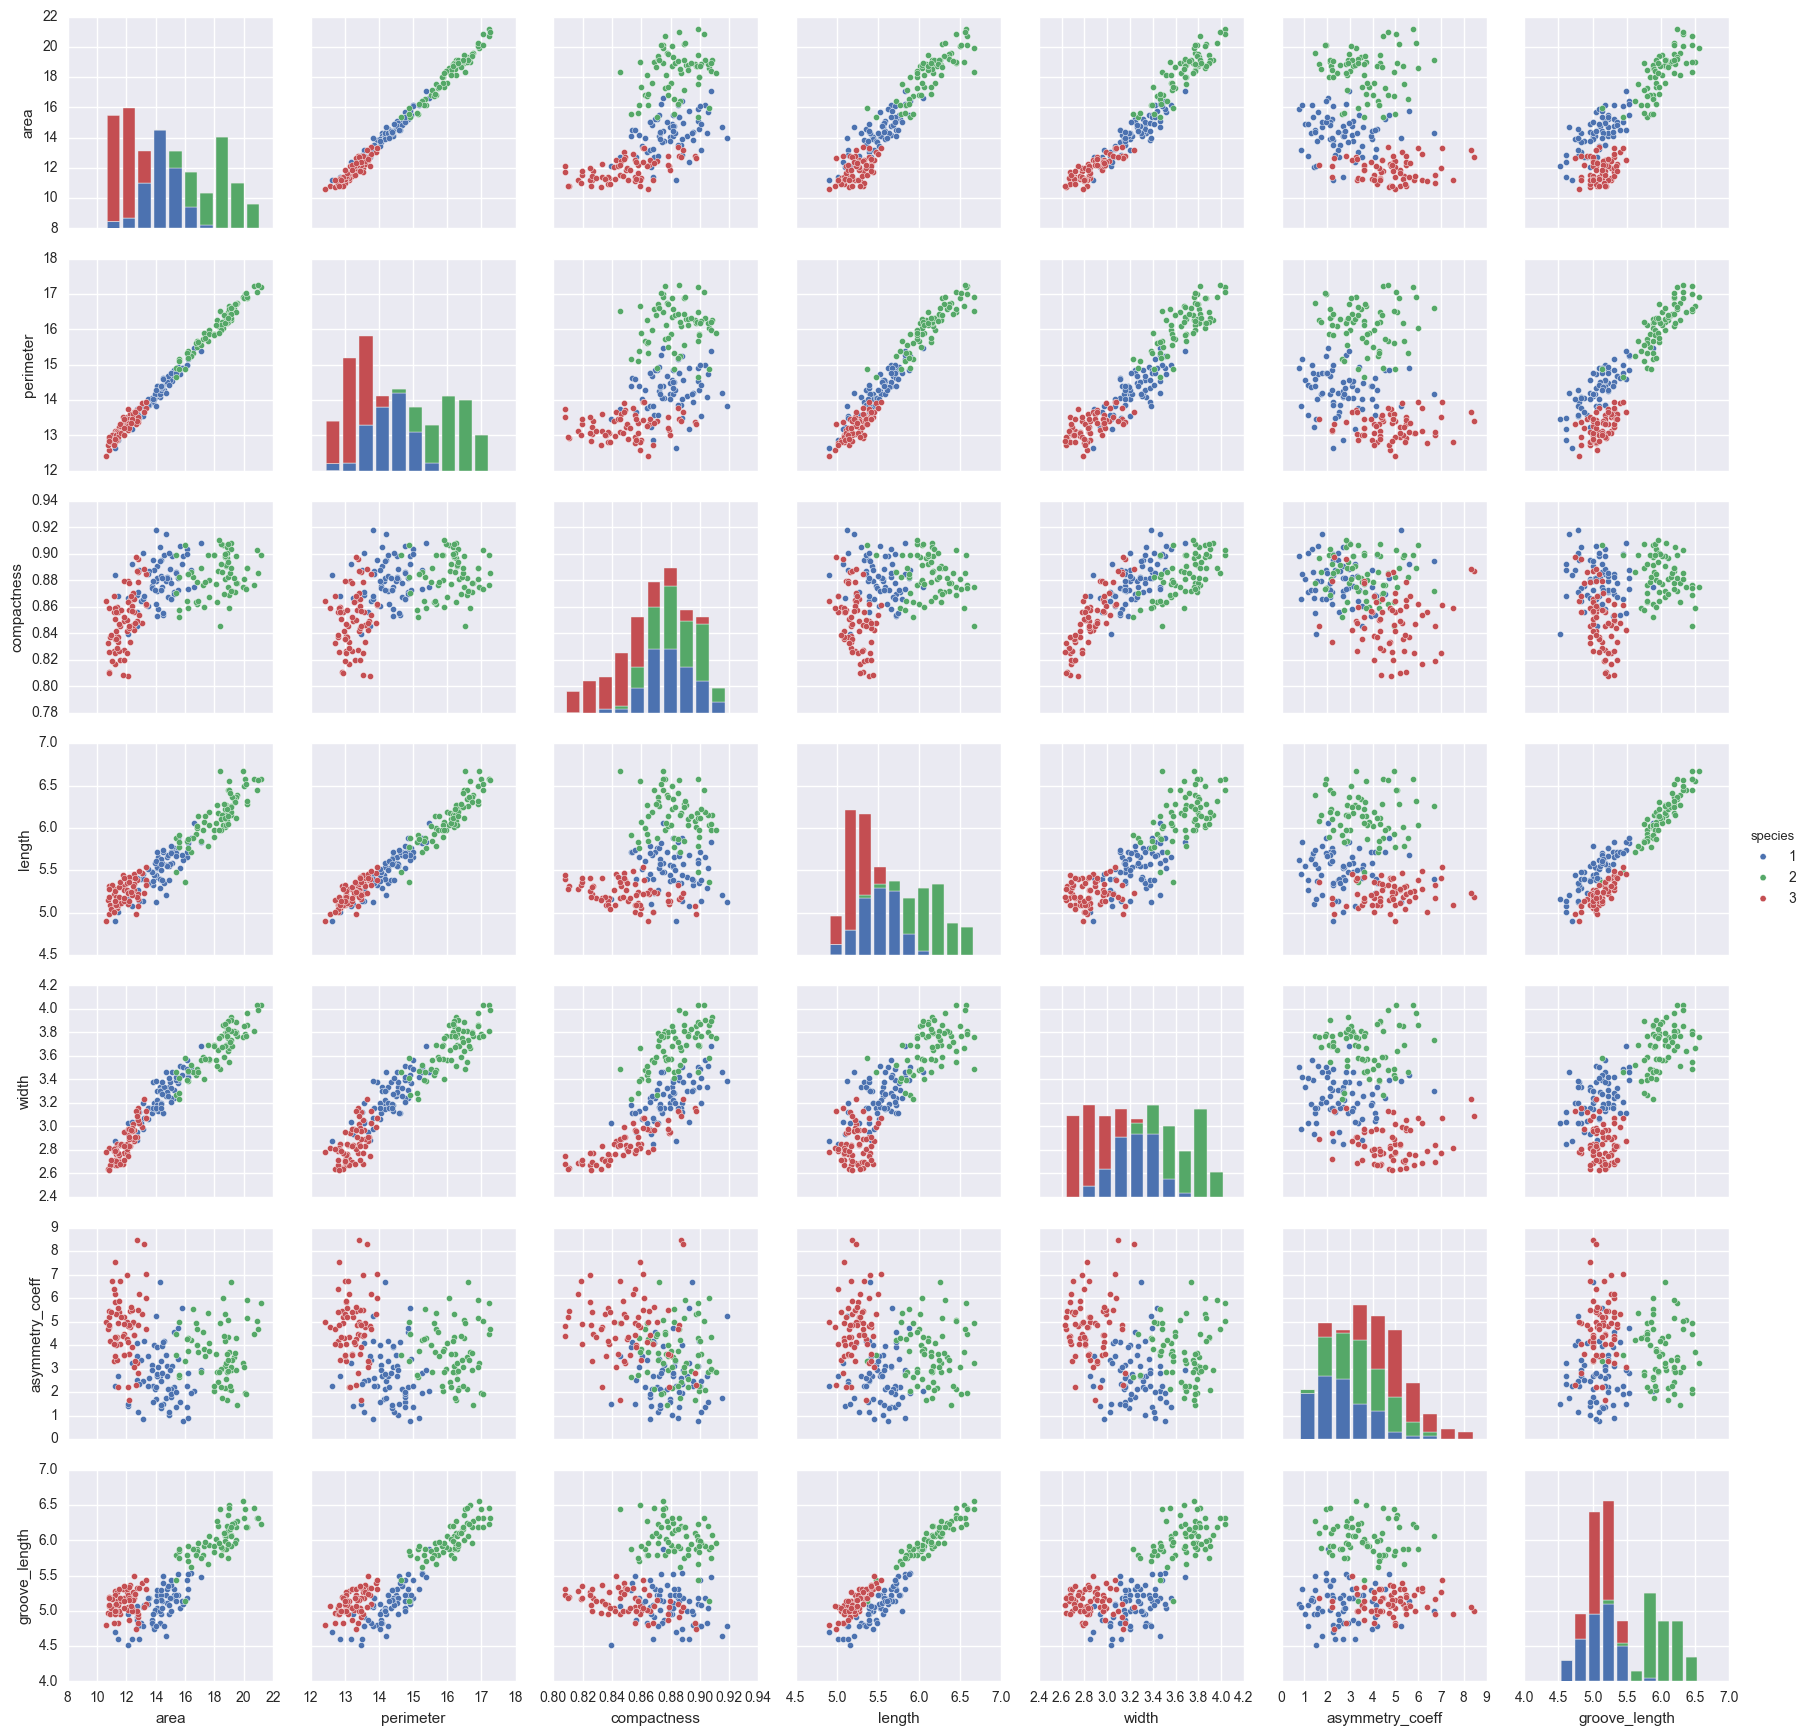

In [22]:
sns.pairplot(seeds, x_vars=cols, y_vars= cols, hue='species')

**Section II: EDA**

In [2]:
# Plot the Data to see the distributions/relationships

In [3]:
# Check for nulls

In [4]:
# Look at distributions, etc.

In [5]:
# Check datatypes

**Section III: Prep for Clustering**

In [6]:
# drop 'species', which is currently acting as a target (categorical)

In [7]:
# Scale the data

**Section IV: Clustering Analysis**

Cluster the Data to our our target groups.

In [10]:
from sklearn.cluster import KMeans



Get the labels and centroids

Compute the Silhoutte Score to measure your analysis